This notebook is borrowed from the official librosa repo https://github.com/librosa/librosa

# Audio effects and playback with Librosa and IPython Notebook

This notebook will demonstrate how to do audio effects processing with librosa and IPython notebook.  You will need IPython 2.0 or later.

By the end of this notebook, you'll know how to do the following:

  - Play audio in the browser
  - Effect transformations such as harmonic/percussive source separation, time stretching, and pitch shifting
  - Decompose and reconstruct audio signals with non-negative matrix factorization
  - Visualize spectrogram data

In [1]:
from __future__ import print_function

In [2]:
import librosa
import librosa.display
import IPython.display
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

In [4]:
# Load the example track
y, sr = librosa.load('speech.wav')

In [5]:
# Play it back!
IPython.display.Audio(data=y, rate=sr)

In [6]:
# How about separating harmonic and percussive components?
y_h, y_p = librosa.effects.hpss(y)

In [7]:
# Play the harmonic component
IPython.display.Audio(data=y_h, rate=sr)

In [8]:
# Play the percussive component
IPython.display.Audio(data=y_p, rate=sr)

In [9]:
# Pitch shifting?  Let's gear-shift by a major third (4 semitones)
y_shift = librosa.effects.pitch_shift(y, sr, 7)

IPython.display.Audio(data=y_shift, rate=sr)

In [10]:
# Or time-stretching?  Let's slow it down
y_slow = librosa.effects.time_stretch(y, 0.5)

IPython.display.Audio(data=y_slow, rate=sr)

In [11]:
# How about something more advanced?  Let's decompose a spectrogram with NMF, and then resynthesize an individual component
D = librosa.stft(y)

# Separate the magnitude and phase
S, phase = librosa.magphase(D)

# Decompose by nmf
components, activations = librosa.decompose.decompose(S, n_components=8, sort=True)

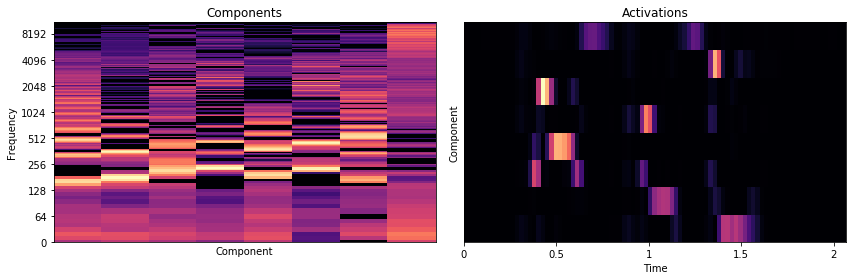

In [12]:
# Visualize the components and activations, just for fun

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
librosa.display.specshow(librosa.amplitude_to_db(components, ref=np.max), y_axis='log')
plt.xlabel('Component')
plt.ylabel('Frequency')
plt.title('Components')

plt.subplot(1,2,2)
librosa.display.specshow(activations, x_axis='time')
plt.xlabel('Time')
plt.ylabel('Component')
plt.title('Activations')

plt.tight_layout()

In [13]:
print(components.shape, activations.shape)

(1025, 8) (8, 89)


In [14]:
# Play back the reconstruction
# Reconstruct a spectrogram by the outer product of component k and its activation
D_k = components.dot(activations)

# invert the stft after putting the phase back in
y_k = librosa.istft(D_k * phase)

# And playback
print('Full reconstruction')

IPython.display.Audio(data=y_k, rate=sr)

Full reconstruction


In [15]:
# Resynthesize.  How about we isolate just first (lowest) component?
k = 0

# Reconstruct a spectrogram by the outer product of component k and its activation
D_k = np.multiply.outer(components[:, k], activations[k])

# invert the stft after putting the phase back in
y_k = librosa.istft(D_k * phase)

# And playback
print('Component #{}'.format(k))

IPython.display.Audio(data=y_k, rate=sr)

Component #0


In [16]:
# Resynthesize.  How about we isolate a middle-frequency component?
k = len(activations) // 2

# Reconstruct a spectrogram by the outer product of component k and its activation
D_k = np.multiply.outer(components[:, k], activations[k])

# invert the stft after putting the phase back in
y_k = librosa.istft(D_k * phase)

# And playback
print('Component #{}'.format(k))

IPython.display.Audio(data=y_k, rate=sr)

Component #4


In [17]:
# Resynthesize.  How about we isolate just last (highest) component?
k = -1

# Reconstruct a spectrogram by the outer product of component k and its activation
D_k = np.multiply.outer(components[:, k], activations[k])

# invert the stft after putting the phase back in
y_k = librosa.istft(D_k * phase)

# And playback
print('Component #{}'.format(k))

IPython.display.Audio(data=y_k, rate=sr)

Component #-1
